# The Transformer Architecture

The original Transformer architecture was a encoder-decoder used for **Machine Translations**

Encoder: Convert the sequence of token into a sequence of  embedding vectors, often called the **hidden state** or **context**.

Decoder: Uses the encoder's hidden state to iteratively generate an output sequence of tokens, one token at a time. 

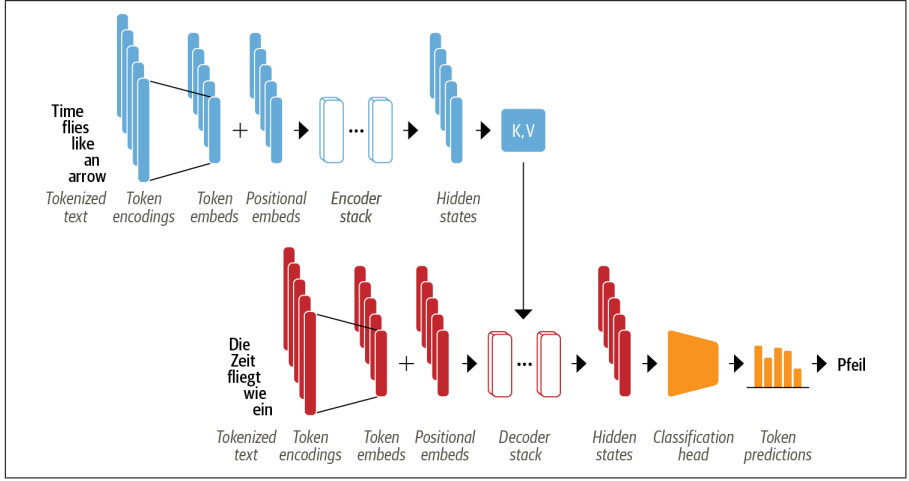

By looking at the figure above we can depict a few things regarding the architecture of the Transformers.

1. The text is tokenized and converted to **token embeddings**. Since the attention_mechanism is not aware of the relative positions of the tokens, we  need a way to inject some information about the positions of the tokens. This is done by finding the token positions. The final output is the combination of token embeds and positional embeds.   
2. The encoder is composed of stack of encoder layers or "blocks". Which is analogous to stacking convolutional layers in CV. The same is true for decoder.
3. The encoder output is then fed to the decoder. Now the decoder takes into account **2 things**. The *tokens generated by the decoder* and the *tokens fed directly to the decoder* to predict the next word. This process continues until a token (EOS) is generated and the generation of next words stops.

Although there are hundereds of different transformers, most of the models belong to one of the Encoder, Decoder, Encoder-Decoder architectures. 

1. Encoder-only: These models convert an input sequence of text into numerical representaion used for **text classification** or **named-entity-recognition(NER)**. BERT or its variants, like RoBERTa and DistilBERT belong to this class of architectures. We have *bidirectinal attention mechanism* in which the token before and after are affected.  
2. Decoder-only: In this models we have **completions tasks** in which a sentence is completed based on the other words in the text. This architecture uses *causal or autoregresive attention mechanism*. 
3. Encoder-Decoder: These architectures use mappings from one sequence to another; they are suitable for **machine translation** and **summarization tasks**. *BART* and *T5* models belong to this class of architectures.

# The Encoder

Each encoder layer consists of 2 sublayers:

1. A multi-head self-attention layer
2. a fully connected feed-forrward layer that is applied to each input embedding.

The output embeddings of each encoder layer have the same size of the inputs. So, basically, the main role of these layers is to update the input embeddings to produce representations that encode some contextual information in the sequence. For example, if the word "apple" is accompanied by keynote or phone is different then the "apple" as a fruit. 

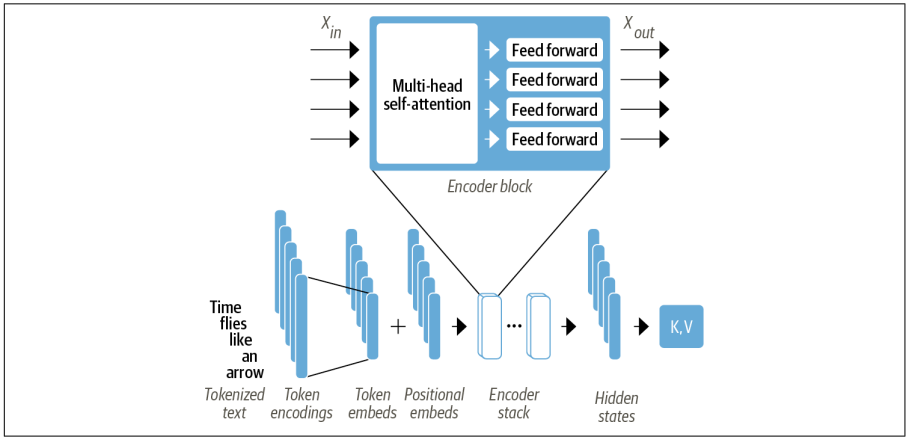



Each of these sublayers are also equiped with skip connections and layer normalizations, which are standard tricks for neural networks. We now go deeper and look at the most important part of an encoder: **Self-attention** layer. 

## Self-attention

Attention is a mechanism that allows neural networks to assign a different amount of weight or "attention" to each element in a sequence. for text sequences, the elements are *token embeddings*, where each token is mapped to a vector of some fixed dimension. For example in BERT, each token is represented as a 768-dimensional vector. The 'self' is referred to the fact that these weights are computed for all hidden states in the same set-for example, all the hidden states of the encoder layers. 